# Importação de Bibliotecas necessárias para a Análise dos Datasets

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np

# Importação e Leitura do Dataset

In [4]:
wwe_titulos = pd.read_csv('tabela_titulos.csv')
wwe_titulos.head()

,SUPERSTARS,DATE,DAYS,TEAMS,TITLES,GENDER
0,Charlotte Flair,2016-04-03,113,NaN,WOMENS_WWE,female
1,Sasha Banks,2016-07-25,27,NaN,WOMENS_WWE,female
2,Charlotte Flair,2016-08-21,43,NaN,WOMENS_WWE,female
3,Sasha Banks,2016-10-03,27,NaN,WOMENS_WWE,female
4,Charlotte Flair,2016-10-30,29,NaN,WOMENS_WWE,female


# Distribuição de frequências para a variável 'DAYS' (Classs de ampitude fixa)

In [5]:
n = wwe_titulos.shape[0]
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

10

## Tabela de Distribuição de Frequênci e Porcentagem

In [6]:
frequencia = pd.value_counts(
    pd.cut(
        x = wwe_titulos.DAYS,
        bins=10,
        include_lowest= True),
    sort= False
    )

porcentagem = pd.value_counts(
    pd.cut(
        x = wwe_titulos.DAYS,
        bins= 10,
        include_lowest= True),
    sort=False, normalize= True
    )* 100

tab_freq_perc = pd.DataFrame({
    'Frequência': frequencia, 'Porcentagem (%)': porcentagem
})
tab_freq_perc

,Frequência,Porcentagem (%)
"(-1.172, 117.1]",294,76.562500
"(117.1, 234.2]",74,19.270833
"(234.2, 351.3]",7,1.822917
"(351.3, 468.4]",5,1.302083
"(468.4, 585.5]",2,0.520833
"(585.5, 702.6]",1,0.260417
"(702.6, 819.7]",0,0.000000
"(819.7, 936.8]",0,0.000000
"(936.8, 1053.9]",0,0.000000
"(1053.9, 1171.0]",1,0.260417


## Criação de Histograma de Distribuião de Frequência

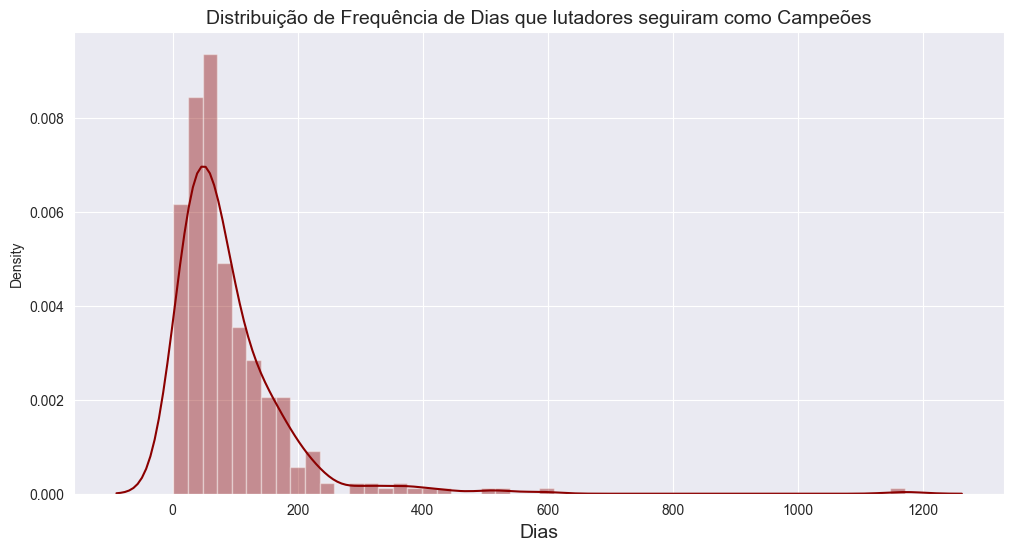

In [7]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # Ignorar UserWarning

ax = sns.distplot(wwe_titulos.query('DAYS > 0').DAYS, color = 'darkred')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência de Dias que lutadores seguiram como Campeões', fontsize=14)
ax.set_xlabel('Dias', fontsize = 14)
ax;

# Medidas de Tendência Central

In [8]:
media = wwe_titulos.DAYS.mean()
print(f'Média: {media}')

Média: 87.19791666666667


In [9]:
mediana = wwe_titulos.DAYS.median()
print(f'Mediana: {mediana}')

Mediana: 63.0


In [10]:
moda = wwe_titulos.DAYS.mode()
print(f'Moda: {moda}')

Moda: 0    49
Name: DAYS, dtype: int64


## Medidas Separarizes

In [11]:
quartis = wwe_titulos.DAYS.quantile([0.25, 0.5, 0.75])
print(f'Quartis:\n{quartis}')

Quartis:
0.25     29.75
0.50     63.00
0.75    112.00
Name: DAYS, dtype: float64


In [12]:
decis =wwe_titulos.DAYS.quantile([i/10 for i in range(1,10)])
print(f'Decis:\n{decis}')

Decis:
0.1     14.0
0.2     28.0
0.3     36.8
0.4     49.0
0.5     63.0
0.6     77.0
0.7     98.0
0.8    131.4
0.9    175.4
Name: DAYS, dtype: float64


In [13]:
percentis = wwe_titulos.DAYS.quantile([i/100 for i in range(1,100)])
print(f'Percentis:\n{percentis}')

Percentis:
0.01      0.00
0.02      0.00
0.03      1.00
0.04      1.00
0.05      1.15
         ...  
0.95    224.00
0.96    234.40
0.97    308.65
0.98    372.02
0.99    445.90
Name: DAYS, Length: 99, dtype: float64


## Medidas de Disperção

In [60]:
days = wwe_titulos[['SUPERSTARS', 'DAYS']]
days

,SUPERSTARS,DAYS
0,Charlotte Flair,113
1,Sasha Banks,27
2,Charlotte Flair,43
3,Sasha Banks,27
4,Charlotte Flair,29
...,...,...
379,Omos,133
380,Kevin Owens,154
381,Sami Zayn,154
382,Cody Rhodes,9


Desvio e Valor absoluto em relação a média de cada valor

In [75]:
# Ignorar UserWarning
warnings.filterwarnings('ignore')

media_days = days['DAYS'].mean()
days.loc[:,'DESVIO'] = days['DAYS'] - media_days #desvio em relação a media de cada valor
days.loc[:,'|DESVIO|'] = days['DESVIO'].abs() #calcula o valor absoluto de cada valor
days

,SUPERSTARS,DAYS,DESVIO,|DESVIO|
0,Charlotte Flair,113,25.802083,25.802083
1,Sasha Banks,27,-60.197917,60.197917
2,Charlotte Flair,43,-44.197917,44.197917
3,Sasha Banks,27,-60.197917,60.197917
4,Charlotte Flair,29,-58.197917,58.197917
...,...,...,...,...
379,Omos,133,45.802083,45.802083
380,Kevin Owens,154,66.802083,66.802083
381,Sami Zayn,154,66.802083,66.802083
382,Cody Rhodes,9,-78.197917,78.197917


Desvio Padrão Total e Desvio Médio Absoluto Total

In [16]:
desvio_padrao_total = wwe_titulos.DAYS.std()
print(f'Desvio Padrão:\n{desvio_padrao_total}')

Desvio Padrão:
98.73760567137667


In [17]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

desvio_medio_absoluto = wwe_titulos.DAYS.mad()
print(f'Desvio Médio Absoluto Total:\n{desvio_medio_absoluto}')

Desvio Médio Absoluto Total:
59.59510633680555


# Distribuição de Frequência das vaiáveis Qualitativas

In [18]:
wwe_titulos

,SUPERSTARS,DATE,DAYS,TEAMS,TITLES,GENDER
0,Charlotte Flair,2016-04-03,113,NaN,WOMENS_WWE,female
1,Sasha Banks,2016-07-25,27,NaN,WOMENS_WWE,female
2,Charlotte Flair,2016-08-21,43,NaN,WOMENS_WWE,female
3,Sasha Banks,2016-10-03,27,NaN,WOMENS_WWE,female
4,Charlotte Flair,2016-10-30,29,NaN,WOMENS_WWE,female
...,...,...,...,...,...,...
379,Omos,2021-04-10,133,NaN,RAW_TAG_TEAM_WWE,male
380,Kevin Owens,2023-04-01,154,NaN,RAW_TAG_TEAM_WWE,male
381,Sami Zayn,2023-04-01,154,NaN,RAW_TAG_TEAM_WWE,male
382,Cody Rhodes,2023-10-07,9,NaN,RAW_TAG_TEAM_WWE,male


## Criação de uma nova tabela com os variáveis qualitativas 'SUPERSTARS', 'GÊNERO' e 'DIAS'

In [38]:
freq_qual = pd.DataFrame({'SUPERSTARS': wwe_titulos.SUPERSTARS,
                          'GÊNERO': wwe_titulos.GENDER,
                          'DIAS': wwe_titulos.DAYS})
freq_qual

,SUPERSTARS,GÊNERO,DIAS
0,Charlotte Flair,female,113
1,Sasha Banks,female,27
2,Charlotte Flair,female,43
3,Sasha Banks,female,27
4,Charlotte Flair,female,29
...,...,...,...
379,Omos,male,133
380,Kevin Owens,male,154
381,Sami Zayn,male,154
382,Cody Rhodes,male,9


## Histograma de Distribuição de Frequência de Gênero com maior tempo como campeões.

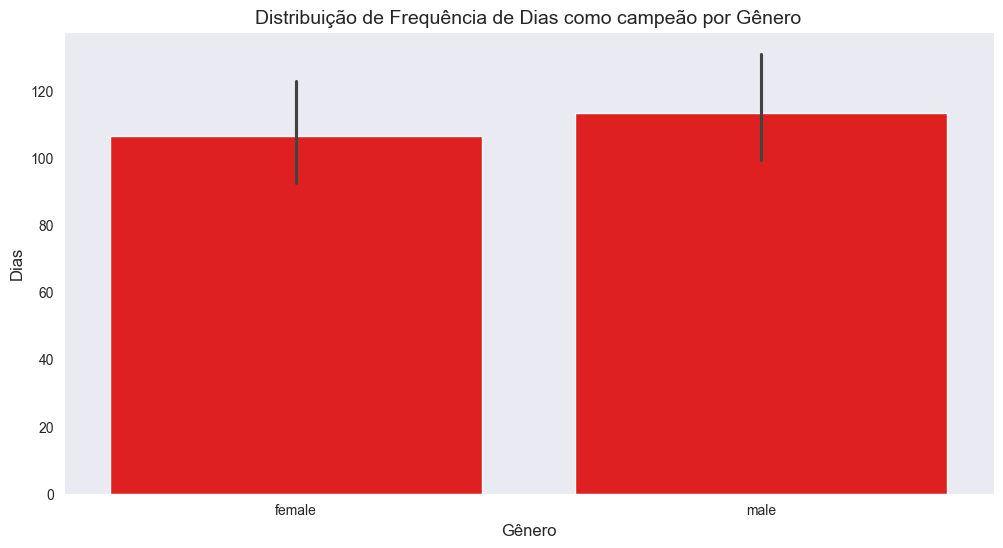

In [20]:
sns.set_style('dark')
ax = sns.barplot(data = freq_qual.query('DIAS > 30'), x ='GÊNERO', y='DIAS', color ='red')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência de Dias como campeão por Gênero', fontsize= 14)
ax.set_xlabel('Gênero', fontsize = 12)
ax.set_ylabel('Dias', fontsize=12)
ax;

## Histograma de Distribuição de Frequência de Lutadores com maior tempo como Campeões

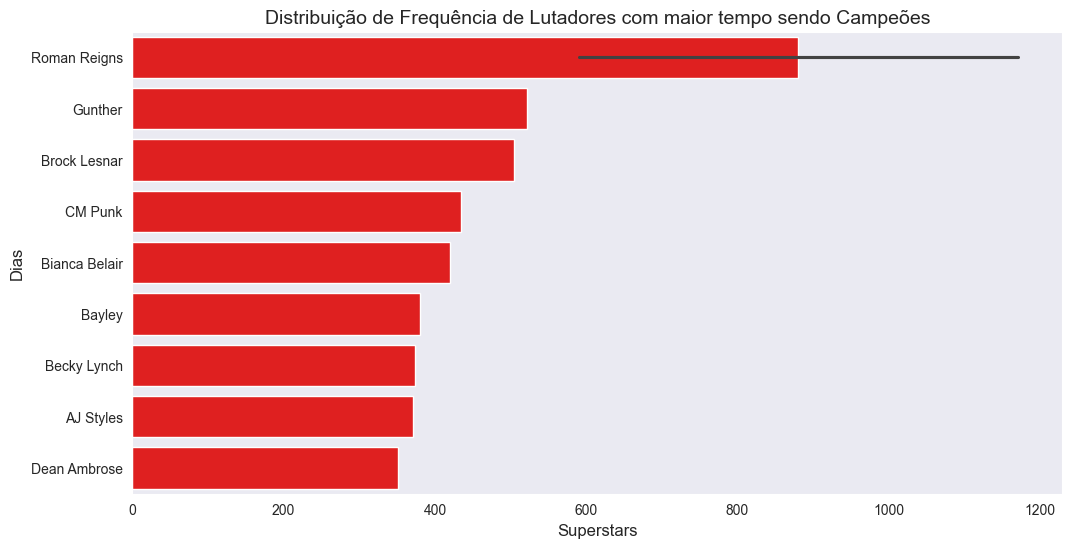

In [21]:
top_lutadores = freq_qual.sort_values(by='DIAS', ascending=False).head(10)

sns.set_style('dark')
ax = sns.barplot(data = top_lutadores, y ='SUPERSTARS', x ='DIAS', color ='red', orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência de Lutadores com maior tempo sendo Campeões', fontsize= 14)
ax.set_xlabel('Superstars', fontsize = 12)
ax.set_ylabel('Dias', fontsize=12)
ax;

## Criação de uma nova tabela com os variáveis qualitativas 'TEAMS', 'GÊNERO' e 'DIAS'

In [22]:
freq_qual2 = pd.DataFrame({'TEAMS': wwe_titulos.TEAMS,
                          'GENERO': wwe_titulos.GENDER,
                          'DIAS': wwe_titulos.DAYS}) 
freq_qual2

,TEAMS,GENERO,DIAS
0,NaN,female,113
1,NaN,female,27
2,NaN,female,43
3,NaN,female,27
4,NaN,female,29
...,...,...,...
379,NaN,male,133
380,NaN,male,154
381,NaN,male,154
382,NaN,male,9


## Histograma de Distribuição de Frequência de Times com maior tempo sendo Campeões

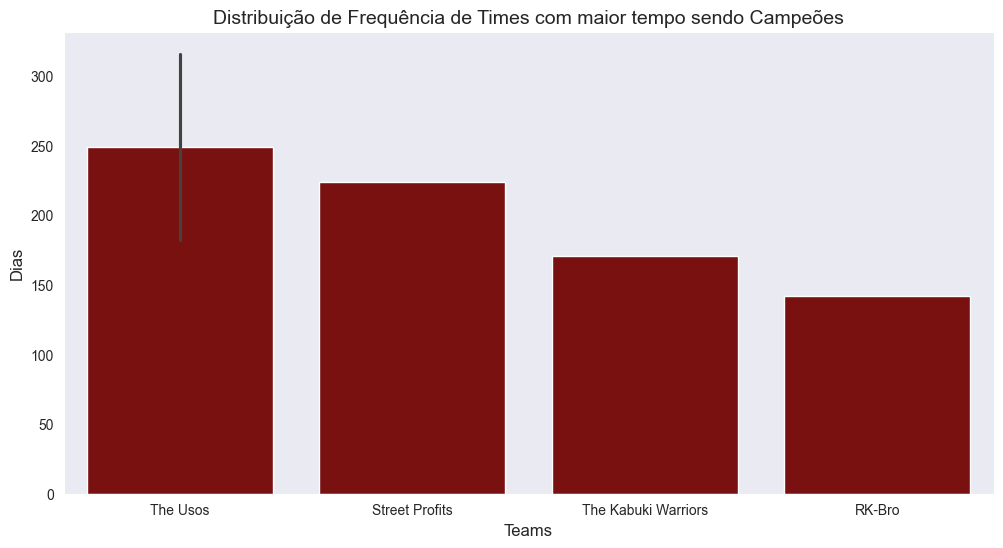

In [27]:
teams = freq_qual2.dropna(subset=['TEAMS'])
top_teams = teams.sort_values(by='DIAS', ascending=False).head(10)

sns.set_style('dark')
ax = sns.barplot(data = top_teams, x ='TEAMS', y ='DIAS', color ='darkred')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência de Times com maior tempo sendo Campeões', fontsize= 14)
ax.set_xlabel('Teams', fontsize = 12)
ax.set_ylabel('Dias', fontsize = 12)
ax;

## Criação de uma nova tabela com os variáveis qualitativas 'TITULOS', 'GÊNERO' e 'DIAS'

In [33]:
freq_qual3 = pd.DataFrame({'TITULOS': wwe_titulos.TITLES,
                          'GENERO': wwe_titulos.GENDER,
                          'DIAS': wwe_titulos.DAYS}) 
freq_qual3

,TITULOS,GENERO,DIAS
0,WOMENS_WWE,female,113
1,WOMENS_WWE,female,27
2,WOMENS_WWE,female,43
3,WOMENS_WWE,female,27
4,WOMENS_WWE,female,29
...,...,...,...
379,RAW_TAG_TEAM_WWE,male,133
380,RAW_TAG_TEAM_WWE,male,154
381,RAW_TAG_TEAM_WWE,male,154
382,RAW_TAG_TEAM_WWE,male,9


## Histograma de Distribuição de Frequência de Títulos com maior tempo sendo Campeões por Gênero


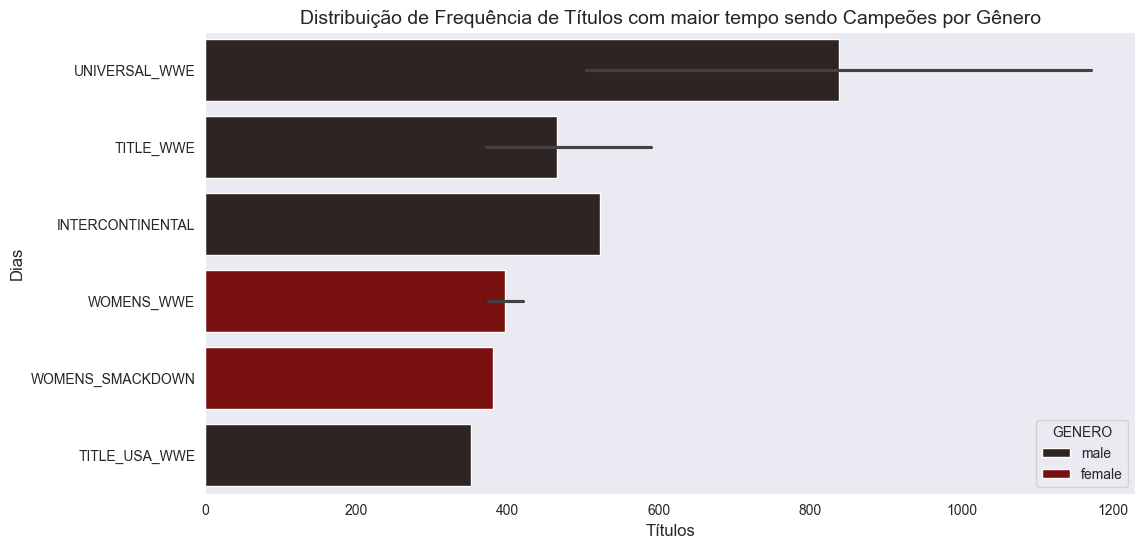

In [37]:
top_titulos = freq_qual3.sort_values(by='DIAS', ascending=False).head(10)

sns.set_style('dark')
ax = sns.barplot(data = top_titulos, y ='TITULOS', x ='DIAS', hue='GENERO', color ='darkred', orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência de Títulos com maior tempo sendo Campeões por Gênero', fontsize= 14)
ax.set_xlabel('Títulos', fontsize = 12)
ax.set_ylabel('Dias', fontsize=12)
ax;